>> ### Correlation between news and stock movement for META

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')

>>> #### Load data

In [2]:
stockData = pd.read_csv("./data/yfinance_data/META_historical_data.csv")
newsData = pd.read_csv('./data/raw_analyst_ratings.csv')

In [3]:
newsData.head(10)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [4]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0
5,2012-12-19,27.830000,28.219999,26.950001,27.410000,27.353790,61390300,0.0,0.0
6,2012-12-20,27.490000,27.600000,27.129999,27.360001,27.303892,35574800,0.0,0.0
7,2012-12-21,26.660000,27.010000,26.120001,26.260000,26.206148,54555200,0.0,0.0
8,2012-12-24,26.500000,26.959999,26.200001,26.930000,26.874775,28230100,0.0,0.0
9,2012-12-26,27.030001,27.180000,26.379999,26.510000,26.455635,33175400,0.0,0.0


>>#### Normalize and Align Dates

In [5]:
from scripts.newsStockCorrelation import normalize_dates
newsData, stockData = normalize_dates(newsData, stockData)

>> #### Perform Sentiment Analysis

In [6]:
from scripts.newsStockCorrelation import analyze_sentiment
newsData = analyze_sentiment(newsData)

In [7]:
newsData.head(10)

,unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,0.00


>> #### Aggregate Sentiments by Date

In [8]:
from scripts.newsStockCorrelation import aggregate_sentiments
sentimentData = aggregate_sentiments(newsData)

In [9]:
sentimentData.head(10)

,date,sentiment
0,2009-02-14 00:00:00+00:00,0.000000
1,2009-04-27 00:00:00+00:00,0.000000
2,2009-04-29 00:00:00+00:00,0.000000
3,2009-05-22 00:00:00+00:00,0.000000
4,2009-05-27 00:00:00+00:00,0.234091
5,2009-05-29 00:00:00+00:00,0.068182
6,2009-05-30 00:00:00+00:00,0.118182
7,2009-06-01 00:00:00+00:00,0.000000
8,2009-06-02 00:00:00+00:00,0.000000
9,2009-06-05 00:00:00+00:00,0.083333


>> #### Calculate Daily Stock Returns

In [10]:
from scripts.newsStockCorrelation import calculate_stock_returns
stockData = calculate_stock_returns(stockData)

In [11]:
stockData.head(10)

,date,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2012-12-12 00:00:00+00:00,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,NaN
1,2012-12-13 00:00:00+00:00,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,2.393038
2,2012-12-14 00:00:00+00:00,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,-5.063740
3,2012-12-17 00:00:00+00:00,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,-0.223795
4,2012-12-18 00:00:00+00:00,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,3.588782
5,2012-12-19 00:00:00+00:00,27.830000,28.219999,26.950001,27.410000,27.353790,61390300,0.0,0.0,-1.082639
6,2012-12-20 00:00:00+00:00,27.490000,27.600000,27.129999,27.360001,27.303892,35574800,0.0,0.0,-0.182412
7,2012-12-21 00:00:00+00:00,26.660000,27.010000,26.120001,26.260000,26.206148,54555200,0.0,0.0,-4.020469
8,2012-12-24 00:00:00+00:00,26.500000,26.959999,26.200001,26.930000,26.874775,28230100,0.0,0.0,2.551409
9,2012-12-26 00:00:00+00:00,27.030001,27.180000,26.379999,26.510000,26.455635,33175400,0.0,0.0,-1.559599


>> #### Merge Datasets

In [12]:
from scripts.newsStockCorrelation import merge_datasets
mergedData = merge_datasets(sentimentData, stockData)

In [13]:
mergedData.head(10)

,date,sentiment,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2012-12-12 00:00:00+00:00,0.037202,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,NaN
1,2012-12-13 00:00:00+00:00,0.056301,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,2.393038
2,2012-12-14 00:00:00+00:00,0.040229,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,-5.063740
3,2012-12-17 00:00:00+00:00,0.074784,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,-0.223795
4,2012-12-18 00:00:00+00:00,0.036038,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,3.588782
5,2012-12-19 00:00:00+00:00,0.034769,27.830000,28.219999,26.950001,27.410000,27.353790,61390300,0.0,0.0,-1.082639
6,2012-12-20 00:00:00+00:00,0.046619,27.490000,27.600000,27.129999,27.360001,27.303892,35574800,0.0,0.0,-0.182412
7,2012-12-21 00:00:00+00:00,0.067556,26.660000,27.010000,26.120001,26.260000,26.206148,54555200,0.0,0.0,-4.020469
8,2012-12-24 00:00:00+00:00,0.076709,26.500000,26.959999,26.200001,26.930000,26.874775,28230100,0.0,0.0,2.551409
9,2012-12-26 00:00:00+00:00,0.049920,27.030001,27.180000,26.379999,26.510000,26.455635,33175400,0.0,0.0,-1.559599


>> #### Correlation Analysis

In [14]:
from scripts.newsStockCorrelation import correlation_analysis

correlation, p_value = correlation_analysis(mergedData)
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: nan, P-value: nan


>> #### Visualization

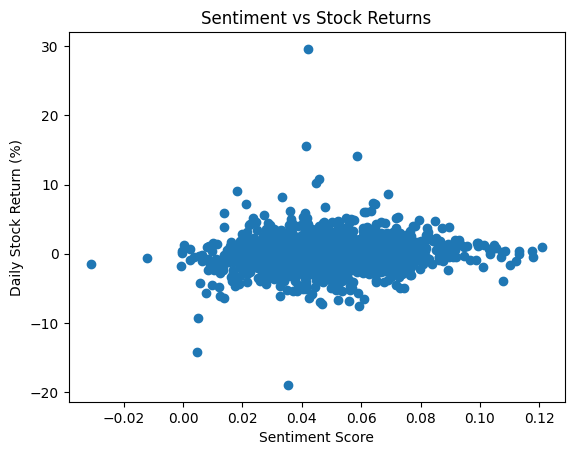

In [15]:
from scripts.newsStockCorrelation import plot_correlation

plot_correlation(mergedData)